In [1]:
# Import our functional system modules
from Playing_field.loan_system import get_loan, default_loan, settle_loan, partial_settle_loan
from Playing_field.loan_generator import populate_loanbook
from Playing_field.calculations import generate_amortization_schedule
import pandas as pd
import matplotlib.pyplot as plt

# Magic command to make plots appear inline in the notebook
%matplotlib inline

# Initialize and populate the system
# The system variable is now the central dictionary holding all data.
system = populate_loanbook(num_to_create=50)

Generating 50 random loans...
Successfully populated system with 50 loans.


In [2]:
# Access data via dictionary keys
print(f"Total loans in book: {len(system['loans'])}")
print(f"Total borrowers in book: {len(system['borrowers'])}")

# Get the first loan and borrower (using the get_loan function)
loan_1 = get_loan(system, "LOAN-0001")
borrower_1 = system['borrowers'][loan_1['borrower_id']]

print("\n--- Sample Loan (LOAN-0001) ---")
# Access data via dictionary keys
print(f"Borrower: {borrower_1['first_name']} (Score: {borrower_1['credit_score']})")
print(f"Principal: ${loan_1['principal']:,.2f}")
print(f"APR: {loan_1['apr']}%")
print(f"Term: {loan_1['term_months']} months")
print(f"Monthly Payment: ${loan_1['monthly_payment']:,.2f}")


Total loans in book: 50
Total borrowers in book: 50

--- Sample Loan (LOAN-0001) ---
Borrower: Charlotte (Score: 809)
Principal: $25,643.05
APR: 3.53%
Term: 24 months
Monthly Payment: $1,108.19


In [8]:
# Get a random loan ID from the system
# random_id = random.choice(list(system['loans'].keys()))
random_id = 'LOAN-0004'
print(f"\n--- Analyzing Random Loan ({random_id}) ---")

# Get the loan dictionary
random_loan = get_loan(system, random_id)

# Generate its amortization schedule (function is updated to accept a dict)
df = generate_amortization_schedule(random_loan)

total_interest = df['Interest'].sum()
print(f"Total interest to be paid: ${total_interest:,.2f}")

# Display the first 5 rows
display(df.head(100))


--- Analyzing Random Loan (LOAN-0004) ---
Total interest to be paid: $3,367.14


,Period,Date,Payment,Principal,Interest,Balance
0,1,2025-12-18,1002.68,868.40,134.28,43892.97
1,2,2026-01-18,1002.68,871.00,131.68,43021.97
2,3,2026-02-18,1002.68,873.61,129.07,42148.36
3,4,2026-03-18,1002.68,876.23,126.45,41272.13
4,5,2026-04-18,1002.68,878.86,123.82,40393.27
5,6,2026-05-18,1002.68,881.50,121.18,39511.77
6,7,2026-06-18,1002.68,884.14,118.54,38627.63
7,8,2026-07-18,1002.68,886.80,115.88,37740.83
8,9,2026-08-18,1002.68,889.46,113.22,36851.37
9,10,2026-09-18,1002.68,892.13,110.55,35959.24



--- Visualizing Schedule ---


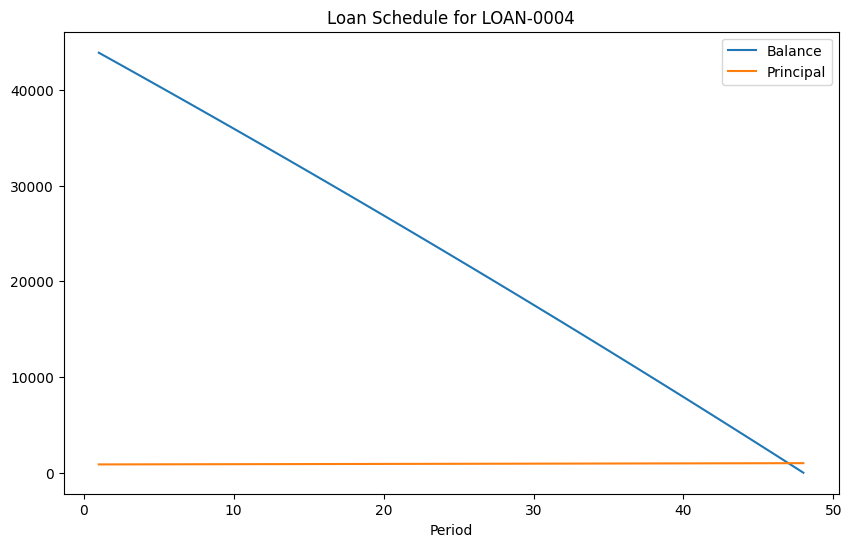

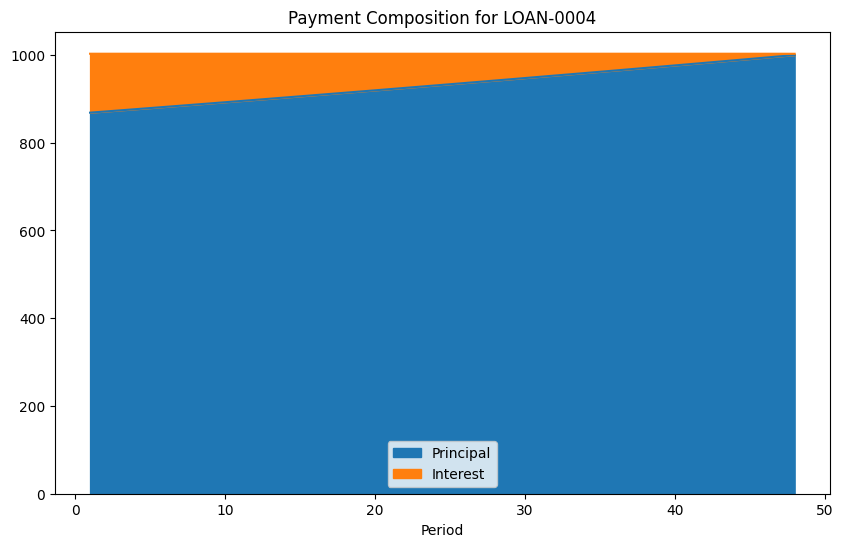

In [4]:
print("\n--- Visualizing Schedule ---")
# Plot the balance and principal paid over time
ax1 = df.plot(
    x='Period',
    y=['Balance', 'Principal'],
    kind='line',
    title=f"Loan Schedule for {random_id}",
    figsize=(10, 6)
)
plt.show() # Explicitly show the plot

# Plot the interest vs principal component of the payment
ax2 = df.plot(
    x='Period',
    y=['Principal', 'Interest'],
    kind='area',
    stacked=True,
    title=f"Payment Composition for {random_id}",
    figsize=(10, 6)
)

In [5]:

print("\n--- DEMONSTRATING LOAN STATUS CHANGES ---")

# We will use the first three loans created (which are guaranteed to be active)
loan_id_default = "LOAN-0002"
loan_id_settle = "LOAN-0003"
loan_id_partial = "LOAN-0004"

# --- 5.1: Default a Loan ---
print(f"\n[5.1] Defaulting Loan {loan_id_default}...")
loan_def = get_loan(system, loan_id_default)
print(f"Original Balance: ${loan_def['outstanding_balance']:,.2f} | Status: {loan_def['status']}")

# Call the default function (passing the system dictionary)
default_loan(system, loan_id_default, reason="Hardship due to job loss")

print(f"New Balance: ${loan_def['outstanding_balance']:,.2f} | New Status: {loan_def['status']}")


# --- 5.2: Settle a Loan ---
print(f"\n[5.2] Settling Loan {loan_id_settle}...")
loan_set = get_loan(system, loan_id_settle)
print(f"Original Balance: ${loan_set['outstanding_balance']:,.2f} | Status: {loan_set['status']}")

# Call the settle function (passing the system dictionary)
settle_loan(system, loan_id_settle)

print(f"New Balance: ${loan_set['outstanding_balance']:,.2f} | New Status: {loan_set['status']}")


# --- 5.3: Partially Settle a Loan (Lump-sum Principal Reduction) ---
print(f"\n[5.3] Partially Settling Loan {loan_id_partial}...")
loan_part = get_loan(system, loan_id_partial)

# Set an arbitrary settlement amount (e.g., 20% of the principal)
settlement_amount = loan_part['principal'] * 0.20
print(f"Original Balance: ${loan_part['outstanding_balance']:,.2f} | Status: {loan_part['status']}")
print(f"Applying lump-sum payment of: ${settlement_amount:,.2f}")

# Call the partial settle function (passing the system dictionary)
partial_settle_loan(system, loan_id_partial, settlement_amount)

print(f"New Balance: ${loan_part['outstanding_balance']:,.2f} | New Status: {loan_part['status']}")


--- DEMONSTRATING LOAN STATUS CHANGES ---

[5.1] Defaulting Loan LOAN-0002...
Original Balance: $38,219.59 | Status: active
Loan LOAN-0002 is now set to DEFAULT. Reason: Hardship due to job loss
New Balance: $38,219.59 | New Status: default

[5.2] Settling Loan LOAN-0003...
Original Balance: $13,476.54 | Status: active
Loan LOAN-0003 is now fully SETTLED. Outstanding balance is zero.
New Balance: $0.00 | New Status: settled

[5.3] Partially Settling Loan LOAN-0004...
Original Balance: $44,761.37 | Status: active
Applying lump-sum payment of: $8,952.27
Recorded Partial Settlement of $8,952.27 on LOAN-0004.
New Outstanding Balance: $35,809.10
New Balance: $35,809.10 | New Status: active



--- PORTFOLIO STATISTICS & ANALYSIS ---

Total Loans: 50
Total Original Principal Issued: $1,301,087.10
Total Current Outstanding Balance: $1,278,658.29

--- Loan Counts by Status ---
status
active     48
default     1
settled     1

Average APR (Simple Mean): 8.60%
Average Borrower Credit Score: 709
Total Defaulted Balance: $38,219.59
Default Rate (by original principal): 2.94%

--- Visualization of Portfolio Distribution ---


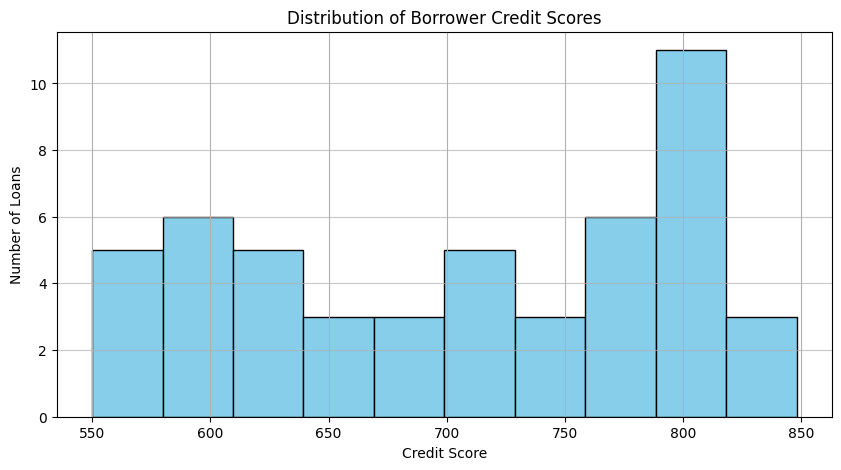

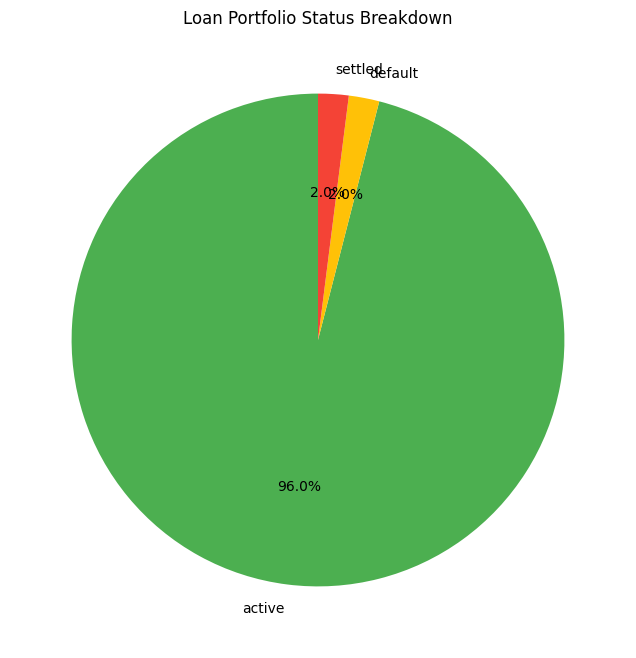

In [6]:
print("\n--- PORTFOLIO STATISTICS & ANALYSIS ---")

# Convert the dictionary of loans into a DataFrame for easy analysis
loans_df = pd.DataFrame(system['loans'].values())

if not loans_df.empty:

    # --- Portfolio Totals ---
    total_principal = loans_df['principal'].sum()
    total_outstanding = loans_df['outstanding_balance'].sum()

    print(f"\nTotal Loans: {len(loans_df)}")
    print(f"Total Original Principal Issued: ${total_principal:,.2f}")
    print(f"Total Current Outstanding Balance: ${total_outstanding:,.2f}")

    # --- Analysis by Status ---
    status_counts = loans_df['status'].value_counts()
    print("\n--- Loan Counts by Status ---")
    print(status_counts.to_string())

    # --- Financial Performance Metrics ---

    # 1. Average APR (weighted or simple)
    avg_apr = loans_df['apr'].mean()
    print(f"\nAverage APR (Simple Mean): {avg_apr:.2f}%")

    # 2. Average Credit Score of Borrowers
    # Merge loan data with borrower data
    borrower_df = pd.DataFrame(system['borrowers'].values())
    loan_borrower_df = pd.merge(loans_df, borrower_df[['id', 'credit_score']],
                                left_on='borrower_id', right_on='id', how='left')

    avg_score = loan_borrower_df['credit_score'].mean()
    print(f"Average Borrower Credit Score: {avg_score:.0f}")

    # 3. Defaulted Balance (if any)
    default_balance = loans_df[loans_df['status'] == 'default']['outstanding_balance'].sum()
    default_percentage = (default_balance / total_principal) * 100 if total_principal > 0 else 0

    print(f"Total Defaulted Balance: ${default_balance:,.2f}")
    print(f"Default Rate (by original principal): {default_percentage:.2f}%")

    # --- Visualization of Portfolio Risk ---
    print("\n--- Visualization of Portfolio Distribution ---")

    # Plot 1: Distribution of Credit Scores
    plt.figure(figsize=(10, 5))
    loan_borrower_df['credit_score'].hist(bins=10, edgecolor='black', color='skyblue')
    plt.title('Distribution of Borrower Credit Scores')
    plt.xlabel('Credit Score')
    plt.ylabel('Number of Loans')
    plt.grid(axis='y', alpha=0.7)
    plt.show()

    # Plot 2: Loan Count by Status
    plt.figure(figsize=(8, 8))
    status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107', '#F44336'])
    plt.title('Loan Portfolio Status Breakdown')
    plt.ylabel('')
    plt.show()

else:
    print("The loan book is empty. Cannot generate statistics.")